# Medical Insurance Cost Prediction Using Machine Learning

This repository focuses on the application of machine learning to predict the costs of medical insurance, utilizing a dataset sourced from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv). The dataset incorporates features derived from individual and local health data, enabling the creation of predictive models to estimate insurance amounts across different categories of individuals. The dataset serves as a valuable resource for training machine learning models aimed at forecasting medical insurance costs based on diverse factors.

## Table of Content

#### PART ONE
1. Importing libraries and dataset
2. Data Exploration
    - Dealing with missing data
    - Visualizing Relationship between Variables
  
#### PART TWO
3. Data Preprocessing
    - Encoding categorical variables
    - Splitting the dataset into train and test set
    - Feature Scaling 
4. Bulding A Model
    - Experiment with various machine learning algorithms 
    - Utilize cross-validation techniques to assess model performance
#### PART THREE
5. Test the Model
    - Validation and Interpretation
    - Validate the model on a separate test set.
6. Conclusion

#### Part ONE: IMPORTING DATA AND EXPLORATION

##### Importing the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
sc = StandardScaler()

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('insurance.csv')

#### Data exploration

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# statistical summary
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Dealing with missing values

In [7]:
dataset.isnull().values.any()

False

In [8]:
dataset.isnull().values.sum()

0

##### Group the dataset by 'sex', 'smoker', 'region' with visualisations

In [9]:
sex = dataset.groupby('sex', axis=0)
pd.DataFrame(sex.size(), columns=['# of observations'])

,# of observations
sex,
female,662
male,676


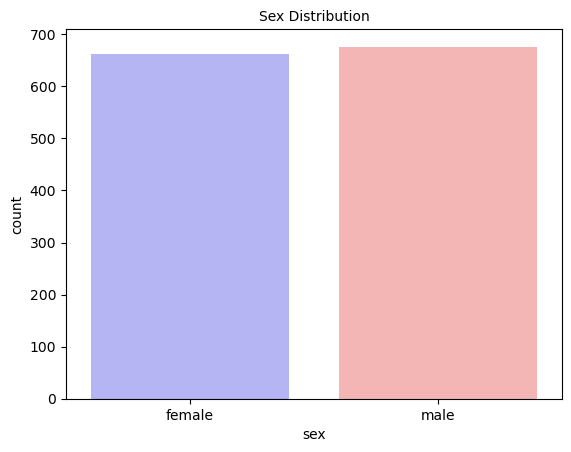

In [10]:
# Visualized Sex Distribution in the dataset.
sns.countplot(x='sex', data=dataset, palette = "bwr")
plt.title("Sex Distribution",fontsize=10)
plt.savefig("Sex Distribution.png")
plt.show()

In [11]:
smokers = dataset.groupby('smoker', axis=0)
pd.DataFrame(smokers.size(), columns=['# of observations'])

,# of observations
smoker,
no,1064
yes,274


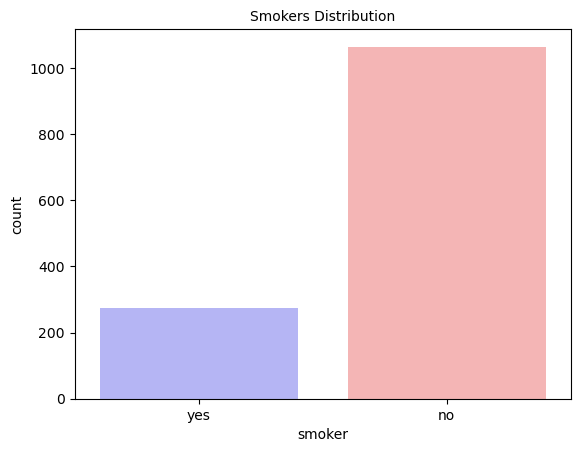

In [12]:
# Visualized Smokers Distribution in the dataset.
sns.countplot(x='smoker', data=dataset,  palette = "bwr")
plt.title("Smokers Distribution",fontsize=10)
plt.savefig("Smokers Distribution.png")
plt.show()

In [13]:
regions = dataset.groupby('region', axis=0)
pd.DataFrame(regions.size(), columns=['# of observations'])

,# of observations
region,
northeast,324
northwest,325
southeast,364
southwest,325


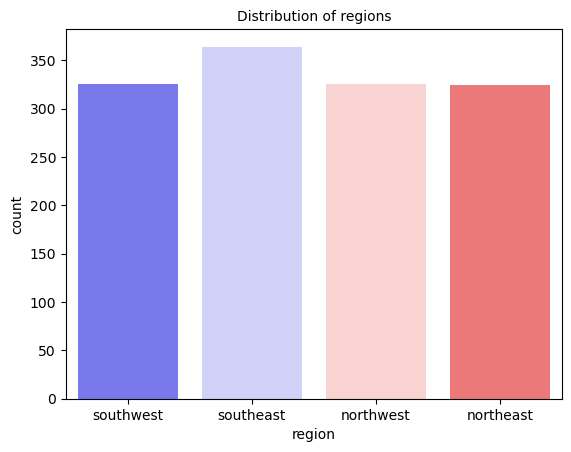

In [14]:
# Visualized Regions in the dataset.
sns.countplot(x='region', data=dataset,  palette = "bwr")
plt.title("Distribution of regions",fontsize=10)
plt.savefig("Region Distribution.png")
plt.show()

#### Visualizing Distribution of Some Variables

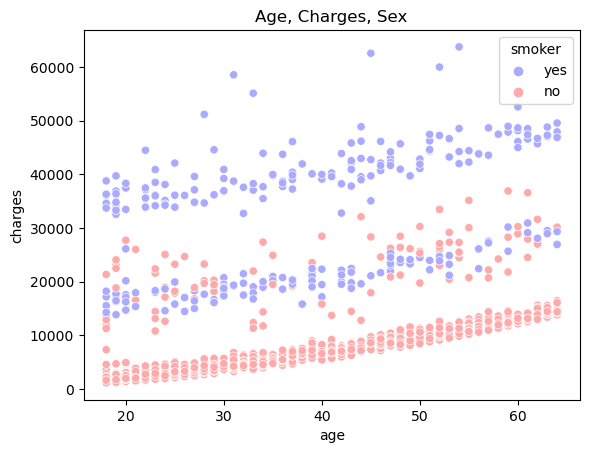

In [15]:
sns.scatterplot(x= "age", y= "charges", hue = 'smoker', data = dataset,  palette = "bwr")
plt.title("Age, Charges, Sex")
plt.savefig("Age, Charges, Sex Distribution.png")
plt.show()

In [16]:
children = dataset.groupby('children', axis=0)
pd.DataFrame(children.size(), columns=['# of observations'])

,# of observations
children,
0,574
1,324
2,240
3,157
4,25
5,18


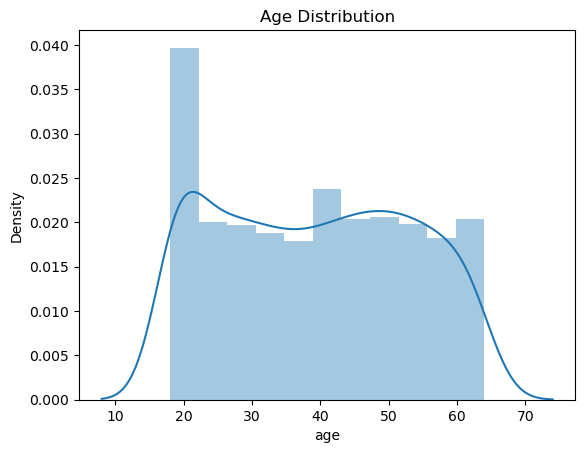

In [17]:
# Distribution of Age
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.savefig("Age Distribution.png")
plt.show()

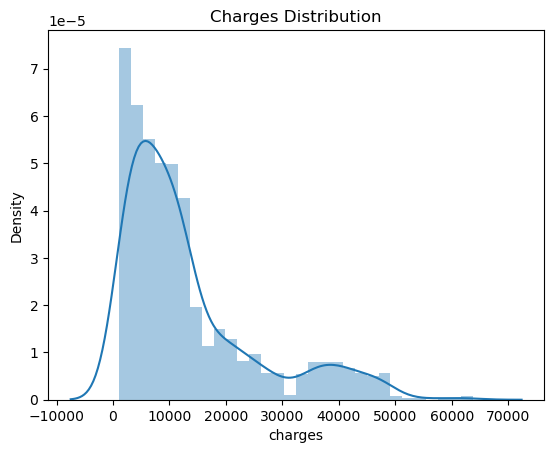

In [18]:
#Distribution of Charge Values
sns.distplot(dataset['charges'])
plt.title('Charges Distribution')
plt.savefig("Charge Distribution.png")
plt.show()

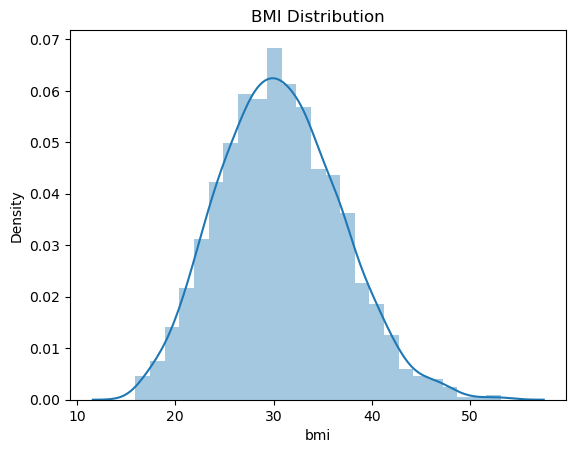

In [19]:
#Distribution of BMI
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.savefig("BMI Distribution.png")
plt.show()

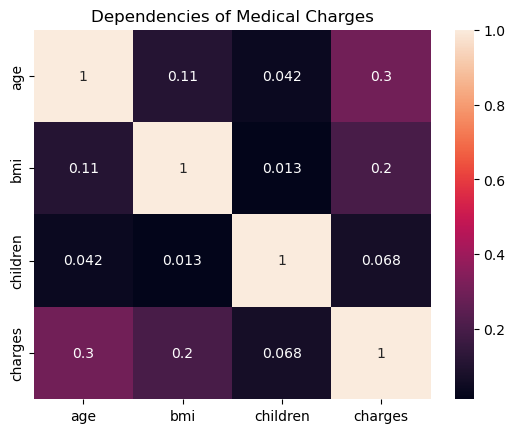

In [20]:
# Select the columns of interest
variables = ['age', 'bmi', 'children', 'charges']
subset_dataset = dataset[variables]

# Compute the correlation matrix
correlation_matrix = subset_dataset.corr()

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True)
plt.title('Dependencies of Medical Charges')
plt.savefig("Dependencies Corr Matrix.png")
plt.show()

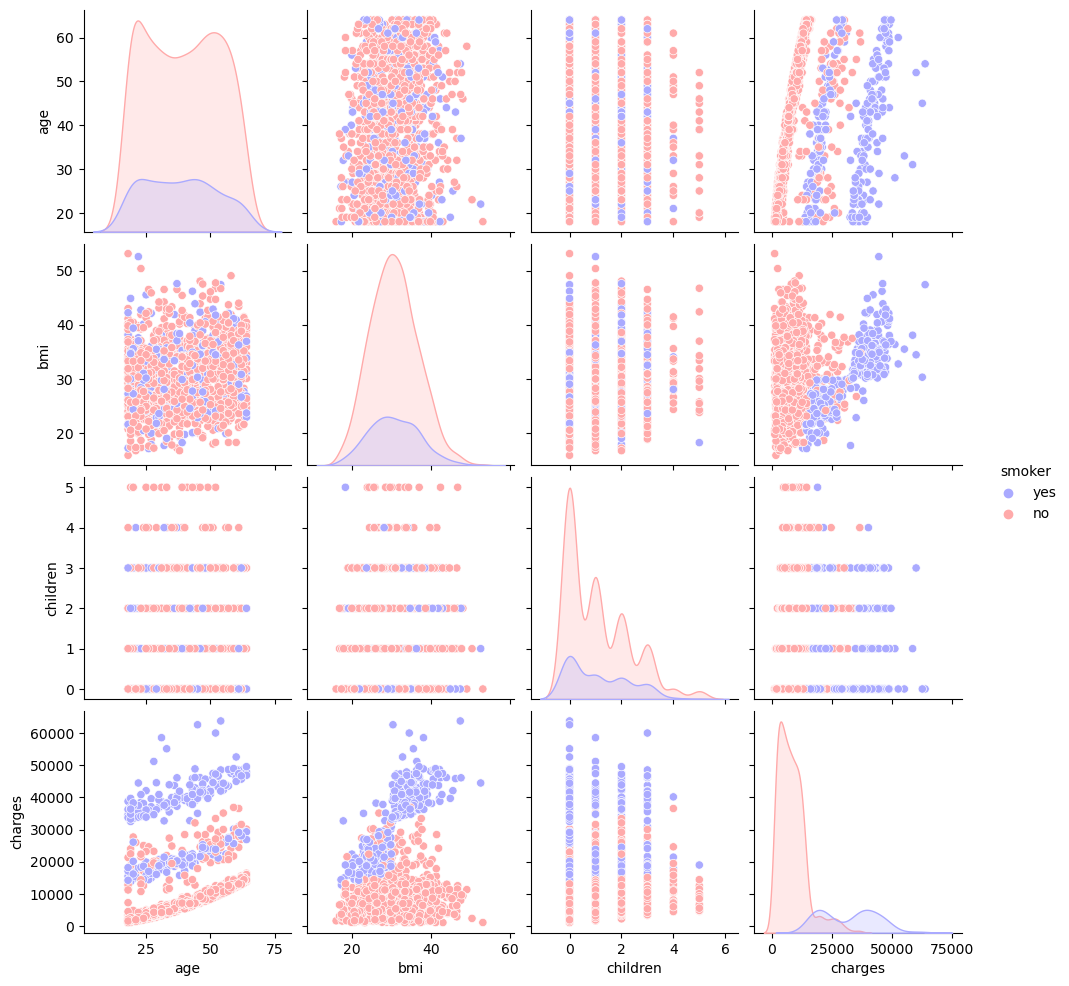

In [21]:
#Visualization the relationship between two variables
sns.pairplot(dataset, hue= 'smoker', palette = 'bwr')
plt.savefig("Pairpolt.png")
plt.show()

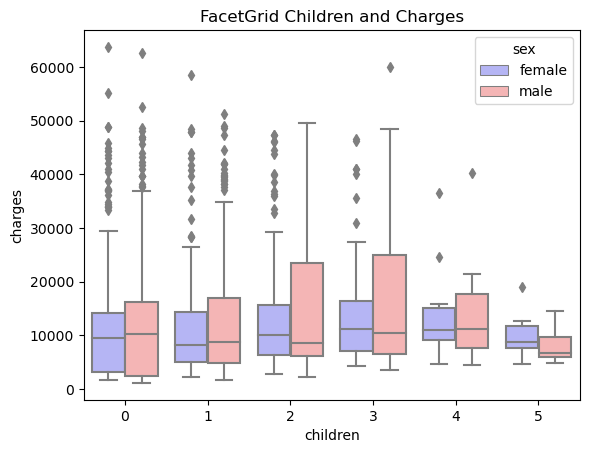

In [22]:
#Visualization the relationship between child and charges
sns.boxplot(x= 'children', y='charges', hue = 'sex', data = dataset, palette = 'bwr')
plt.title('FacetGrid Children and Charges')
plt.savefig("Boxplot.png")
plt.show()

#### Data Preprocessing

In [23]:
# Examine the data types in the dataset
categorical_variable = dataset.select_dtypes(include='object').columns
numerical_variable = dataset.select_dtypes(include='int64').columns

print(categorical_variable)
print(numerical_variable)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'children'], dtype='object')


#### Encoding the categorical data
**Three (3)** of the columns in the dataset are numeric, while the remaining **three (3)** are categorical. Machine learning models struggle with categorical values as computers have difficulty interpreting textual data. Consequently, we will assign numerical labels to these categories to facilitate the model's understanding and processing.

In [24]:
# Encoding is to be done for discrete categorical data (sex,bmi,region).

dataset['sex'] = dataset['sex'].map({'male':0,'female':1})
dataset['smoker'] = dataset['smoker'].map({'yes':1,'no':0})
dataset['region'] = dataset['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [25]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


#### Splitting the dataset

In [26]:
# matrix of features / independent variables
X = dataset.drop(columns='charges')

In [27]:
# target / dependent variable
y = dataset['charges']

In [28]:
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [29]:
print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of x_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070,)
Size of x_test :  (268, 6)
Size of Y_test :  (268,)


#### Feature scaling

In [30]:
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

In [31]:
X_train

array([[ 0.47222651,  1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -1.37405059],
       [ 0.54331294,  1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -0.46929112],
       [ 0.8987451 ,  1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.43546834],
       ...,
       [ 1.3252637 , -0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -0.46929112],
       [-0.16755139,  1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.3402278 ],
       [ 1.1120044 , -0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.3402278 ]])

In [32]:
x_test

array([[ 0.40114007,  1.0246016 , -0.89153925,  0.73433626, -0.50874702,
        -0.46929112],
       [-0.23863782,  1.0246016 , -0.08946143, -0.91119211, -0.50874702,
        -1.37405059],
       [ 1.75178229,  1.0246016 , -0.60845296, -0.91119211,  1.96561348,
        -1.37405059],
       ...,
       [-0.09646495, -0.97598911, -0.41972876, -0.08842793, -0.50874702,
        -0.46929112],
       [ 1.04091797,  1.0246016 ,  2.78941026, -0.91119211,  1.96561348,
         0.43546834],
       [ 0.82765867,  1.0246016 ,  0.60252728, -0.08842793, -0.50874702,
         1.3402278 ]])

### PART TWO
#### Model Building

#### 1) Multiple linear regression

In [33]:
regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred_lr = regressor_lr.predict(x_test)

In [35]:
# Confusion Matrix Score
cv_linear_reg = cross_val_score(estimator = regressor_lr, X = X, y = y, cv = 10)

# The R-squared (R2) score, also known as the coefficient of determination
r2_score_linear = r2_score(y_test, y_pred_lr)

#Mean Absolute Error (MAE)
mae_linear = mean_absolute_error(y_test, y_pred_lr)

#Root Mean Squared Error (RMSE):
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_lr))

In [36]:
print('Cross Validation Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear))
print('MAE : {0:.3f} '.format(mae_linear))
print('RMSE : {0:.3f}'.format(rmse_linear))

Cross Validation Linear Regression : 0.745
R2_score (test) : 0.783
MAE : 4196.963 
RMSE : 5808.313


#### 2) Random Forest Regression

In [37]:
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
y_pred_rf = regressor_rf.predict(x_test)

In [39]:
# Confusion Matrix Score
cv_rf = cross_val_score(estimator = regressor_rf, X = X, y = y, cv = 10)

# The R-squared (R2) test score, also known as the coefficient of determination
r2_score_rf = r2_score(y_test, y_pred_rf)

#Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

#Root Mean Squared Error (RMSE):
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

In [40]:
print('Cross Validation Random Forest Regression : {0:.3f}'.format(cv_rf.mean()))
print('R2_score (test) : {0:.3f}'.format(r2_score_rf))
print('MAE : {0:.3f} '.format(mae_rf))
print('RMSE : {0:.3f}'.format(rmse_rf))

Cross Validation Random Forest Regression : 0.835
R2_score (test) : 0.865
MAE : 2509.085 
RMSE : 4578.276


#### 3) XGBoost Regression

In [41]:
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [42]:
y_pred_xgb = regressor_xgb.predict(x_test)

In [43]:
# Confusion Matrix Score
cv_xgb = cross_val_score(estimator = regressor_xgb, X = X, y = y, cv = 10)

# The R-squared (R2) test score, also known as the coefficient of determination
r2_score_xgb = r2_score(y_test, y_pred_xgb)

#Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

#Root Mean Squared Error (RMSE):
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

In [44]:
print('Cross Validation XGBoost : {0:.3f}'.format(cv_xgb.mean()))
print('R2_score (test) : {0:.3f}'.format(r2_score_xgb))
print('MAE : {0:.3f} '.format(mae_xgb))
print('RMSE : {0:.3f}'.format(rmse_xgb))

Cross Validation XGBoost : 0.860
R2_score (test) : 0.876
MAE : 2502.961 
RMSE : 4380.144


#### 4. K- Nearest Neighbors

In [45]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [46]:
y_pred_knn = knn_model.predict(x_test)

In [47]:
# Confusion Matrix Score
cv_knn = cross_val_score(estimator = knn_model, X = X, y = y, cv = 10)

# The R-squared (R2) test score, also known as the coefficient of determination
r2_score_knn = r2_score(y_test, y_pred_knn)

#Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

#Root Mean Squared Error (RMSE):
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))

In [48]:
print('Cross Validation XGBoost : {0:.3f}'.format(cv_knn.mean()))
print('R2_score (test) : {0:.3f}'.format(r2_score_knn))
print('MAE : {0:.3f} '.format(mae_knn))
print('RMSE : {0:.3f}'.format(rmse_knn))

Cross Validation XGBoost : 0.115
R2_score (test) : 0.826
MAE : 3146.181 
RMSE : 5192.240


#### Comparing All Models

In [49]:
models = [('Multiple Linear Regression', r2_score_linear, mae_linear, rmse_linear, cv_linear_reg.mean()),
          ('Random Forest Regression', r2_score_rf, mae_rf, rmse_rf, cv_rf.mean()),
          ('XGBoost Regression', r2_score_xgb, mae_xgb, rmse_xgb, cv_xgb.mean()),
          ('K-Nearest Neighbors', r2_score_knn, mae_knn, rmse_knn, cv_knn.mean())]

In [50]:
predict_model = pd.DataFrame(data = models, columns=['Model', 'R Squared(test)', 'MAE', 'RMSE', 'Cross validation'])
predict_model

,Model,R Squared(test),MAE,RMSE,Cross validation
0,Multiple Linear Regression,0.782694,4196.963226,5808.313048,0.744528
1,Random Forest Regression,0.864987,2509.084807,4578.276424,0.834645
2,XGBoost Regression,0.876420,2502.960693,4380.143884,0.859623
3,K-Nearest Neighbors,0.826347,3146.181083,5192.239876,0.114847


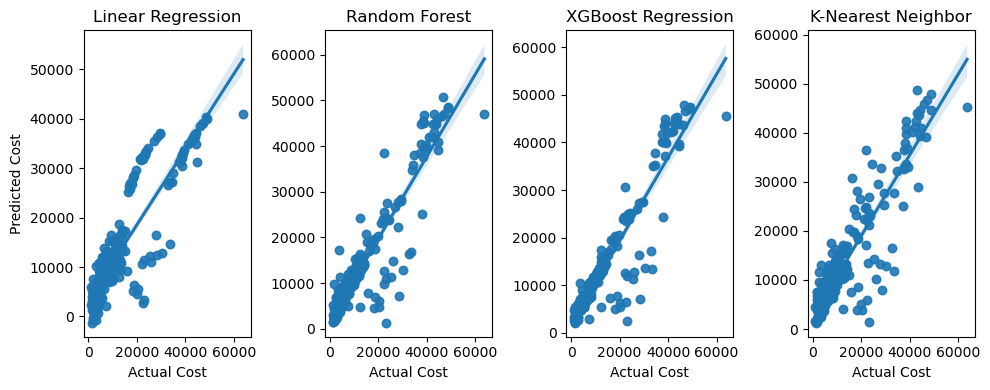

In [51]:
# Plotting
plt.figure(figsize=(10, 4))

# Scatter plot for Linear Regression
plt.subplot(1, 4, 1)
sns.regplot(x=y_test, y=y_pred_lr)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')

# Scatter plot for Random Forest
plt.subplot(1, 4, 2)
sns.regplot(x=y_test, y=y_pred_rf)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest')
plt.xlabel('Actual Cost')


# Scatter plot for XGBoost
plt.subplot(1, 4, 3)
sns.regplot(x=y_test, y=y_pred_xgb)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.title('XGBoost Regression')
plt.xlabel('Actual Cost')


# Scatter plot for K-Nearest Neighbor
plt.subplot(1, 4, 4)
sns.regplot(x=y_test, y=y_pred_knn)
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.title('K-Nearest Neighbor')
plt.xlabel('Actual Cost')


plt.tight_layout()
plt.savefig("Models.png")
plt.show()

#### Part THREE : PREDICT CHARGES FOR NEW CUSTOMERS

In our  situation, XGBoost Regression  is  the  best  regression  model and may be used to calculate insurance of patients/clients using this best model, thus `regressor_xgb.predict(sc.transform(bio_data))`

In [52]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


#### Patient Number 3589 Bio Data
    Name: Frank
    Age: 40
    Sex: = Male
    bmi: 45.50
    Number of Children: 4
    Smoking Status: Yes
    Region: North East

In [53]:
#create a list of biodata given in accordance to the table column noting that male = 1, north east = 0, smoker = 0
frank_data = [[40,1, 45.5, 4, 0, 0]]

In [54]:
frank_charge = regressor_xgb.predict(sc.transform(frank_data))
print(f"The cost of medical insurance for Frank is: {frank_charge[0]:.2f}")

The cost of medical insurance for Frank is: 10654.35


#### Patient Number 5002 Bio Data
    Name: Sara
    Age:19
    bmi:27.9
    Children:0
    Sex:female
    Smoker:no
    Region: northwest

In [55]:
#create a list of biodata given in accordance to the table column noting that female = 0, north east = 1, smoker = 1
sara_data = [[19, 0, 27.9, 0, 0, 0]]
sara_charge = regressor_xgb.predict(sc.transform(sara_data))

In [56]:
print(f"The cost of medical insurance for Sarah is: {sara_charge[0]:.2f}")

The cost of medical insurance for Sarah is: 2279.09
